In [51]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import requests

In [52]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


# Gathering data from timesjobs website

In [53]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

job_name = []
company_name = []
experience = []
location = []
job_desc = []
key_skills = []
pay_scale = []  

# Iterate over the pages
for j in range(1, 39):
    webpage = requests.get('https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=jobs&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=jobs&searchBy=0&rdoOperator=OR&pDate=I&sequence=2&startPage={}'.format(j)).text
    soup = BeautifulSoup(webpage, 'lxml')
    jobs_div = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

    for i in jobs_div:
        try:
            name = i.find('h2').find('a').text.strip()
            job_name.append(name)
        except:
            job_name.append(np.nan)
        
        # Extract the company name
        try:
            company = i.find('h3', class_='joblist-comp-name').text.strip()
            company_name.append(company)
        except:
            company_name.append(np.nan)
        
        # Extract experience details
        try:
            exp_ul = i.find('ul', class_='top-jd-dtl clearfix')
            exp = exp_ul.find('li').text.strip()
            experience.append(exp)
        except:
            experience.append(np.nan)
        
        # Extract location details
        try:
            locn_ul = i.find('ul', class_="top-jd-dtl clearfix")
            locn_li = locn_ul.find_all('li')
            locn_span = locn_li[2].find('span').text.strip()
            location.append(locn_span)
        except:
            location.append(np.nan)
        
        # Extract job description
        try:
            desc_ul = i.find_all('ul', class_="list-job-dtl clearfix")[0]
            desc_li = desc_ul.find('li').text.strip()
            job_desc.append(desc_li)
        except:
            job_desc.append(np.nan)

        # Extract key skills
        try:
            skills = i.find('span', class_="srp-skills").text.strip()
            key_skills.append(skills)
        except:
            key_skills.append(np.nan)

        # Extract pay scale information
        try:
            pay_ul = i.find_all('ul', class_="top-jd-dtl clearfix")[0]  # Adjust index if needed
            pay_li = pay_ul.find_all('li')[1].text.strip()
            pay_scale.append(pay_li)
        except:
            pay_scale.append(np.nan)

# Create a DataFrame with the collected data
df = pd.DataFrame({
    'job_name': job_name,
    'company_name': company_name,
    'experience': experience,
    'location': location,
    'job_desc': job_desc,
    'key_skills': key_skills,
    'pay_scale': pay_scale,
})

final = pd.DataFrame()  


final = pd.concat([final, df], ignore_index=True)



# DATA CLEANING

In [57]:
final['company_name']=final['company_name'].str.split('\n').str.get(0)

In [58]:
final['experience']=final['experience'].str.split('l').str.get(1)

In [59]:
final['job_desc']=final['job_desc'].str.split('\n').str.get(1)

In [60]:
final['pay_scale']=final['pay_scale'].str.replace('Lacs p.a.','L.P.A').str.split('₹').str.get(1)

In [61]:
final.rename(columns={
    'company_name':'Job_type'
},inplace=True)

In [62]:
final.head(2)

,job_name,Job_type,experience,location,job_desc,key_skills,pay_scale
0,Wanted Gynecologist Junior / Senior Register f...,M care Jobs,4 - 5 yrs,NaN,Wanted Gynecologist Junior / Senior Register f...,"Obstetrics , Gynaecologist",NaN
1,Branch Sales Manager-Agency / Health Insurance,JOBS N TA HR SERVICES,5 - 10 yrs,"Bengaluru / Bangalore, Chennai, Nellore, Ot...",Manager - Agency will be responsible for handl...,"Agency Manager , Branch Manager , Branch H...",Rs 5.00 - 10.00 L.P.A


In [ ]:
final.to_csv('Timesjobs_webscraping_data_gathering.csv')

# Data Visualization

In [63]:
final1=final['Job_type'].value_counts().reset_index()

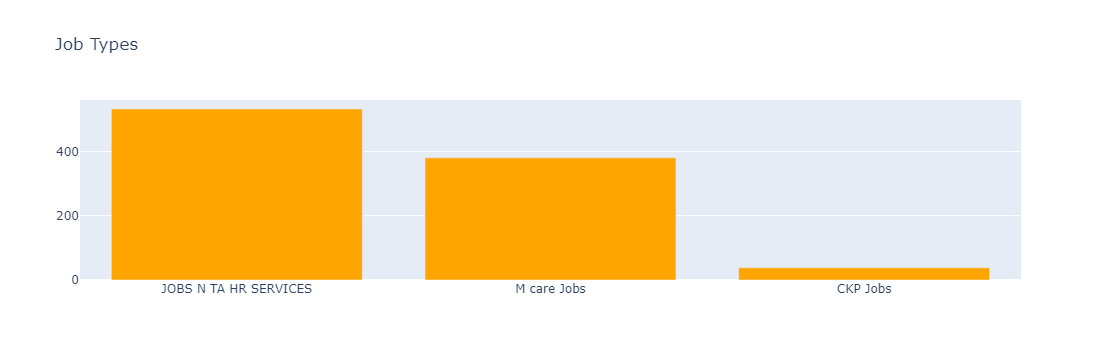

In [65]:
import plotly.graph_objects as go

# Create a bar chart trace
trace = go.Bar(x=final1['Job_type'], y=final1['count'],marker=dict(color='orange'))

# Define the layout
layout = go.Layout(title='Job Types')

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()
